In [11]:
library(ISLR)
library(dplyr)
library(leaps)

# Linear Model Selection and Regularization

* [Variable Selection](#Variable-Selection)
* [The Test Error](#The-Test-Error)
    * [Indirect Estimatoins](#Indirect-Estimatoins)
* [Shrinkage Methods](#Shrinkage-Methods)
    * [Ridge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)

Recall the linear regression model: $$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$ where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

The linear regression model is commonly used to describe the relationship between a response Y and a set of variables $X_j,~1\leq j\leq p$. 

**Prediction Accuracy**: Provided that the true relationship between the response and the predictors is approximately linear, the least-squares estimates will have low bias.
Let n denotes the number of observations and $p$ denotes the number of variables.

* If $n \gg  p$  ($n$ is much larger than $p$), least squares estimates tend to also have low variance and, thus, can perform well on test observations.

* If $n$ is **not** much larger than $p$, then there can be a lot of variability in the least-squares fit, resulting in **overfitting** and consequently poor predictions on future observations not used in model training.

* If $n<p$, then there is no longer a unique least squares coefficient estimate: the variance is infinite so the **method cannot be used at all**. 

The variance at the cost of a negligible increase in bias can be reduced significantly by **constraining** or **shrinking** the estimated coefficients.

**Model Interpretability**: In many multiple regression models, several variables are not associated with the response. The resulting model can become more complex if such irrelevant variables are included.
Including leads to. Nonetheless, removing these variables can lead to a model that is more easily interpreted. This task can be done by simply setting the corresponding coefficient estimates
to zero! On the other hand, least-squares is extremely unlikely to yield any coefficient estimates that are exactly zero.

## Variable Selection
There are three important classes of methods that can be used for **variable selection**

* **Subset Selection**: a subset of the $p$ predictors is used for fitting a model using least squares.

* **Shrinkage (regularization)**: A model is fitted using all $p$ predictors. However, the estimated coefficients are shrunken towards zero relative to the least-squares estimates.

* **Dimension Reduction**. the $p$ predictors are projected into a M-dimensional subspace where $M < p$. Then these $M$ projections are used as predictors to fit a linear regression model by least squares.

* <font color='Blue'>**Subset Selection**</font>:
    * **Best Subset Selection**: All $\left(\begin{array}{c}p\\k \end{array}\right)$ models that contain exactly k predictors are fitted, and then a single best model is choosen.
    * **Stepwise Selection**:
        * <font color='Green'>**Forward Stepwise Selection**</font>: It begins with a model containing no predictors and then predictors are added to the model iteratively until all of the predictors are in the model. The variable that gives the greatest additional
improvement to the fit is added to the model at each step.
        * <font color='Green'>**Backward Stepwise Selection**</font>: Unlike forward stepwise selection, here the process begins  with the full least squares model containing all $p$ predictors, and then the least useful predictors are removed iteratively,
        * <font color='Green'>**Hybrid Approaches**</font>: Variables are added to the model sequentially; however, after adding each new variable, the method may also remove any variables that no longer provide an improvement in the model fit.

## The Test Error
Selecting the best model for the test error:

* The test error can be **indirectly** estimated by adjusting the training error to account for the bias due to overfitting.
* The test error can be **directly** estimated using either a validation set approach or a *cross-validation* approach.

### Indirect Estimatoins
Let $\hat{\sigma}^2$ be an estimate of the variance of the error terms. Then
\begin{align}
C_p &= \frac{1}{n} (RSS + 2d\hat{\sigma}^2 ),\\
AIC &= \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2),\\
AIC &= \frac{1}{n\hat{\sigma}^2}(RSS + \log(n)d\hat{\sigma}^2),\\
\text{Adjusted }R^2 &= 1 -\frac{RSS/(n − d − 1)}{TSS/(n − 1)}. 
\end{align}

### Direct Estimatoins
Cross-validation used to be computationally prohibitive for many large problems; however, with recent advantages in computing, performing cross-validation is no longer an issue. Thus, cross-validation is a very attractive approach for selecting from among a number of models under consideration.

## Shrinkage Methods

### Ridge Regression
The main difference between least squares and this method is that the coefficients are estimated by minimizing a slightly different quantity.

The ridge regression coefficient estimates $\hat{\beta}^R$ are the values that minimize

$$\underbrace{\sum_{i=1}^{n}\left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2}_{RSS}
+ \sum_{j=1}^{p} \beta_j^2=RSS+\sum_{j=1}^{p} \beta_j^2$$
where $\lambda \geq$ 0 is a *tuning parameter*. 

### Lasso Regression
The lasso coefficients, $\hat{\beta}^L_\lambda$, minimize the quantity

$$\underbrace{\sum_{i=1}^{n}\left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2}_{RSS}
+ \sum_{j=1}^{p} |\beta_j^2|=RSS+\sum_{j=1}^{p} |\beta_j^2|$$

**Example** Let's use Hitters dataset which is extracted from [ISLR](https://cran.r-project.org/web/packages/ISLR/index.html) R package.

In [38]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


The ```na.omit()``` function removes all of the rows that have missing values in any variable.

In [39]:
Hitters=na.omit(Hitters)

To check that we have removed all *Nan* values, we can try

In [40]:
Number_of_Nan = function(df) {
    # return the number of NaN
    return(sum(is.na(df)))
}

In [41]:
Number_of_Nan(Hitters)

[1] 0

The ```regsubsets()``` function (from the ***leaps*** library) performs best subset selection by finding the best model that that has the least RSS.

In [42]:
regfit_full = regsubsets(Salary~., data = Hitters)
summary(regfit_full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

* asterisks indicate that a given variable is included in the corresponding model!

Now,, let's try

In [43]:
regfit_full = regsubsets(Salary~., data = Hitters, nvmax = 19)
reg_summary = summary(regfit_full)

The ```summary()``` function also returns $R^2$ , $RSS$, adjusted $R^2$ , $C_p$ , and $BIC$.

In [44]:
names(reg_summary)
reg_summary$rsq

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

* Note the ```type="l"``` option tells R to connect the plotted points with lines.

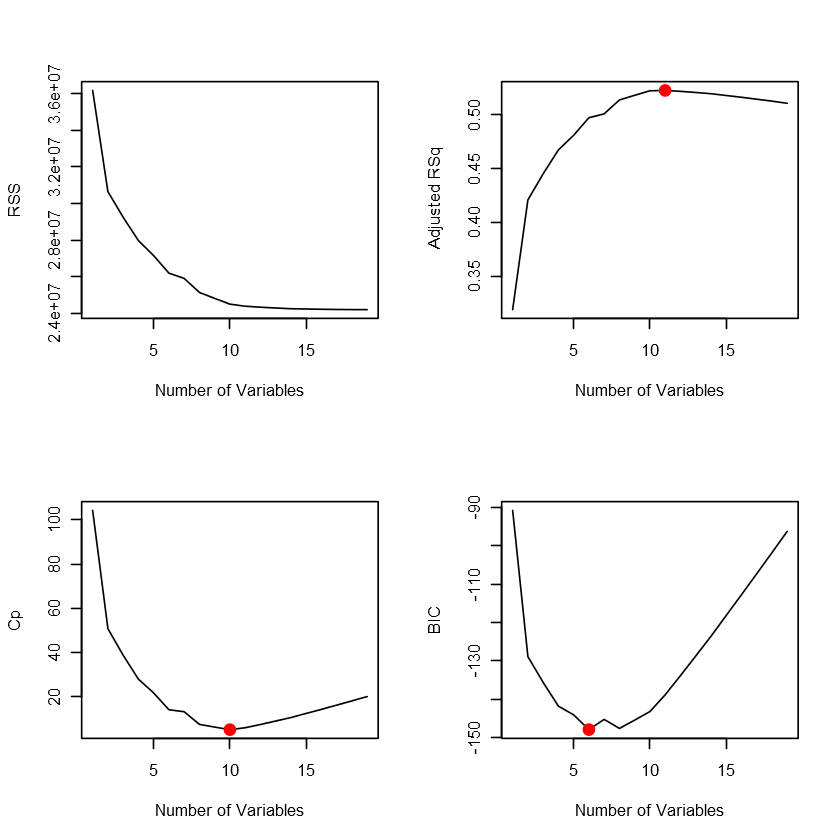

In [45]:
# a 2 by 2 grid
par(mfrow = c(2,2))
# RSS Plot
plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
# adjusted RSq plot
plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
# highlighting the maximum point
points(which.max(reg_summary$adjr2), reg_summary$adjr2[adj_r2_max], col ="red", cex = 2, pch = 20)
# Cp plot
plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
# highlighting the minimum point
points( which.min(reg_summary$cp), reg_summary$cp[cp_min], col = "red", cex = 2, pch = 20)
# BIC plot
plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
# highlighting the minimum point
points(which.min(reg_summary$bic), reg_summary$bic[bic_min], col = "red", cex = 2, pch = 20)

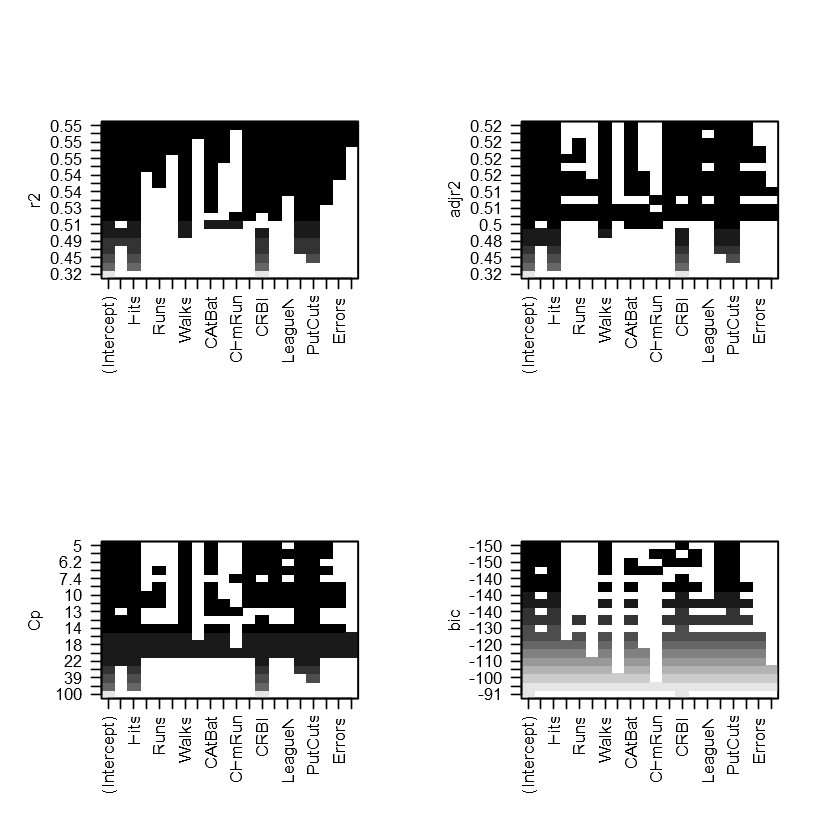

In [46]:
# a 2 by 2 grid
par(mfrow = c(2,2))
plot(regfit_full, scale = "r2")
plot(regfit_full, scale = "adjr2")
plot(regfit_full, scale = "Cp")
plot(regfit_full, scale = "bic")

To see the coefficients we can try:

In [52]:
coef(regfit_full, which.max(reg_summary$adjr2))

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

In [53]:
coef(regfit_full, which.max(reg_summary$cp))

(Intercept)        CRBI 
274.5803864   0.7909536

In [54]:
coef(regfit_full, which.max(reg_summary$bic))

(Intercept)        CRBI 
274.5803864   0.7909536

##  Forward and Backward Stepwise Selection

In [65]:
# Forward
regfit_fwd = regsubsets(Salary~., data = Hitters, nvmax = 19, method = "forward")
reg_summary_fwd = summary(regfit_fwd)

In [66]:
# Backward
regfit_bwd = regsubsets(Salary~., data = Hitters, nvmax = 19, method = "backward")
reg_summary_bwd = summary(regfit_bwd)

In [36]:
coef(regfit_full, 7)
coef(regfit_fwd, 7)
coef(regfit_bwd, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847